In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# import data
df_train = pd.read_table('data/crime-train.txt')
df_test = pd.read_table('data/crime-train.txt')

X_train = df_train.iloc[:, 1:].values
y_train = df_train.iloc[:, :1].values.reshape(-1)

X_test = df_test.iloc[:, 1:].values
y_test = df_test.iloc[:, :1].values.reshape(-1)

print X_train.shape
print y_train.shape
print X_test.shape
print y_test.shape


/Users/ayush/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


(1595, 95)
(1595,)
(1595, 95)
(1595,)


In [2]:
def lasso_solver(X, y, w, reg):
    z = (X ** 2).sum(axis=0)
    while True:
        w_old = np.copy(w)
        for j in range(w.shape[0]):
            w[j] = 0
            y_ = np.matmul(X, w)
            rho_j = np.dot(X[:, j], y - y_)
            if rho_j < -reg / 2:
                w[j] = (rho_j + reg / 2) / z[j]
            elif rho_j > reg / 2:
                w[j] = (rho_j - reg / 2) / z[j]
                
        # check for convergence
        if np.max(w_old - w) < 1e-6:
            return w
 

In [3]:
W = np.empty([0, X_train.shape[1]], dtype=np.float64)
regs = [600.0 / (2 ** i) for i in range(10)]
w = np.random.normal(0, 1, W.shape[1])
for i in range(10):
    w = np.copy(W[-1]) if i != 0 else np.random.normal(0, 1, W.shape[1])
    W = np.vstack((W, lasso_solver(X_train, y_train, w, regs[i])))

print W.shape

(10, 95)


[[ 0.          0.          0.          0.          0.        ]
 [ 0.          0.         -0.04526062  0.03996005  0.        ]
 [ 0.          0.         -0.07080149  0.06123108  0.0019376 ]
 [ 0.          0.         -0.06818754  0.06866224  0.01632349]
 [-0.00029423  0.         -0.06758146  0.07084997  0.01828873]
 [-0.01080259  0.         -0.06479923  0.07744415  0.01575762]
 [-0.01752028  0.         -0.05855615  0.0815141   0.01345309]
 [-0.0285043   0.00136939 -0.05491361  0.08046707  0.01557093]
 [-0.03707229  0.01025598 -0.05363904  0.07626569  0.01631061]
 [-0.03722078  0.0152268  -0.07074577  0.06960981  0.01843326]]


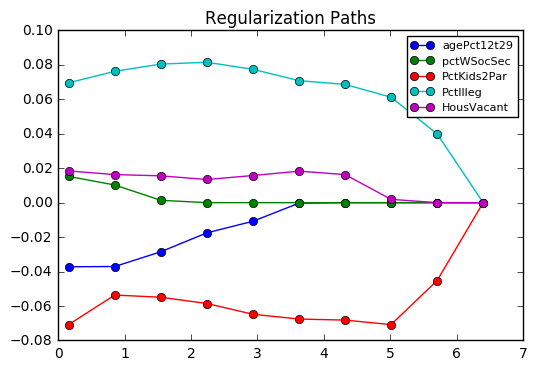

In [4]:
# plot regularization paths
features = ['agePct12t29', 'pctWSocSec', 'PctKids2Par', 'PctIlleg', 'HousVacant']
ids = [df_train.columns.get_loc(feature) - 1 for feature in features]

plt.title('Regularization Paths')
plt.plot(np.log(regs), W[:, ids], marker='o')
plt.legend(features, fontsize=8)
plt.show()

In [ ]:
# plot squared errors
